<h1> Q1.</h1>

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
mean_age_per_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_age_per_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [4]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [5]:
result_1 = users.groupby('occupation').agg({'age': ['min','max']})
result_1

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [6]:
result_2 = users.groupby(['occupation','gender']).agg({'age': ['mean']})
result_2

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [7]:
df = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
df

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889


<h1>Q2.</h1>

In [8]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [9]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [10]:
teams_count = euro12['Team'].count()
teams_count

16

In [11]:
len(euro12.columns)


35

In [12]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [13]:
sorted_values = discipline.sort_values(['Red Cards','Yellow Cards'])
sorted_values

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [14]:
mean_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [15]:
goals_per_team = euro12[['Team','Goals']]
greater_goals = goals_per_team[goals_per_team['Goals']  > 6]
greater_goals

,Team,Goals
5,Germany,10
13,Spain,12


In [16]:
Teams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_valTeams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

In [17]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [18]:
euro12.iloc[:, list(range(32))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [19]:
shooting_accuracy = euro12[['Team','Shooting Accuracy']]
val = shooting_accuracy.loc[shooting_accuracy.Team.isin(['England','Italy','Russia'])]
val

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h1>Q3.</h1>

In [30]:
import random
col1,col2,col3 = [],[],[]

for i in range(0,100):
    n1 = random.randint(1,4)
    col1.append(n1)
    n2 = random.randint(1,3)
    col2.append(n2)
    n3 = random.randint(10000,30000)
    col3.append(n3)

data = {'Col1' : col1,'Col2':col2,'Col3':col3}
df = pd.DataFrame(data)
df.head()

,Col1,Col2,Col3
0,4,3,20735
1,2,1,25770
2,3,3,24639
3,2,2,25859
4,3,2,29802


In [31]:
df.rename(columns = {'Col1': 'bedrs', 'Col2': 'bath','Col3':'price_sqr_meter'}, inplace = True)
df.head()

,bedrs,bath,price_sqr_meter
0,4,3,20735
1,2,1,25770
2,3,3,24639
3,2,2,25859
4,3,2,29802


In [35]:
total_col = col1+col2+col3
df['bigcolumn'] = total_col
df

,bedrs,bath,price_sqr_meter,bigcolumn
0,3,2,19750,4
1,1,1,18596,2
2,1,3,21310,3
3,1,1,17244,2
4,1,1,16648,3
...,...,...,...,...
295,4,2,18198,19434
296,4,1,19577,25834
297,1,2,28435,24255
298,3,2,11799,11025


In [33]:
col_1,col_2,col_3 = [],[],[]

for i in range(0,300):
    n1 = random.randint(1,4)
    col_1.append(n1)
    n2 = random.randint(1,3)
    col_2.append(n2)
    n3 = random.randint(10000,30000)
    col_3.append(n3)

data = {'bedrs' : col_1,'bath':col_2,'price_sqr_meter':col_3}
df = pd.DataFrame(data)
df.head()

,bedrs,bath,price_sqr_meter
0,3,2,19750
1,1,1,18596
2,1,3,21310
3,1,1,17244
4,1,1,16648


In [34]:
total_col = col1+col2+col3
df['bigcolumn'] = total_col
df

,bedrs,bath,price_sqr_meter,bigcolumn
0,3,2,19750,4
1,1,1,18596,2
2,1,3,21310,3
3,1,1,17244,2
4,1,1,16648,3
...,...,...,...,...
295,4,2,18198,19434
296,4,1,19577,25834
297,1,2,28435,24255
298,3,2,11799,11025


<h1>Q4.</h1>

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [37]:
data["DateTime"] = pd.to_datetime(
    data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1)
)
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [38]:
data_new = data.set_index("DateTime")
data_new.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='DateTime', length=6574, freq=None)

In [39]:
data_new.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


<h1>Q5.</h1>

In [50]:
import pandas as pd

In [53]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [52]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [54]:
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

Number of observations: 4622


In [55]:
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [56]:
print("Columns:", chipo.columns.tolist())

Columns: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [57]:
print("Indexing:", chipo.index)

Indexing: RangeIndex(start=0, stop=4622, step=1)


In [58]:
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [59]:
most_ordered_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity ordered for the most-ordered item:", most_ordered_quantity)

Quantity ordered for the most-ordered item: 761


In [60]:
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered item in choice_description:", most_ordered_choice)

Most-ordered item in choice_description: [Diet Coke]


In [61]:
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [62]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [63]:
print("Type of item_price:", chipo['item_price'].dtype)

Type of item_price: float64


In [64]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)

Revenue for the period: 39237.02


In [65]:
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


In [66]:
average_revenue_per_order = revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39423118865867


In [67]:
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)

Number of different items sold: 50


<h1>Q6.</h1>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the local dataset
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Filter the data for the years between 1867 and 2014
filtered_data = data[(data['Year'] >= 1867) & (data['Year'] <= 2014)]

# Calculate per capita values
filtered_data['Marriages_per_capita'] = filtered_data['Marriages'] / filtered_data['Population'] * 1000
filtered_data['Divorces_per_capita'] = filtered_data['Divorces'] / filtered_data['Population'] * 1000

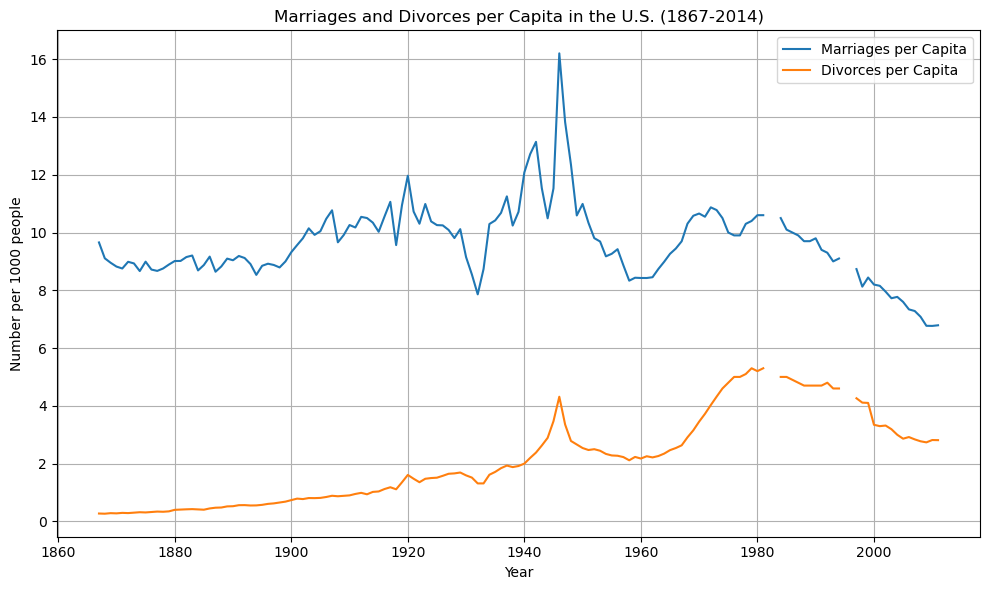

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Year'], filtered_data['Marriages_per_capita'], label='Marriages per Capita')
plt.plot(filtered_data['Year'], filtered_data['Divorces_per_capita'], label='Divorces per Capita')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Q7.</h1>

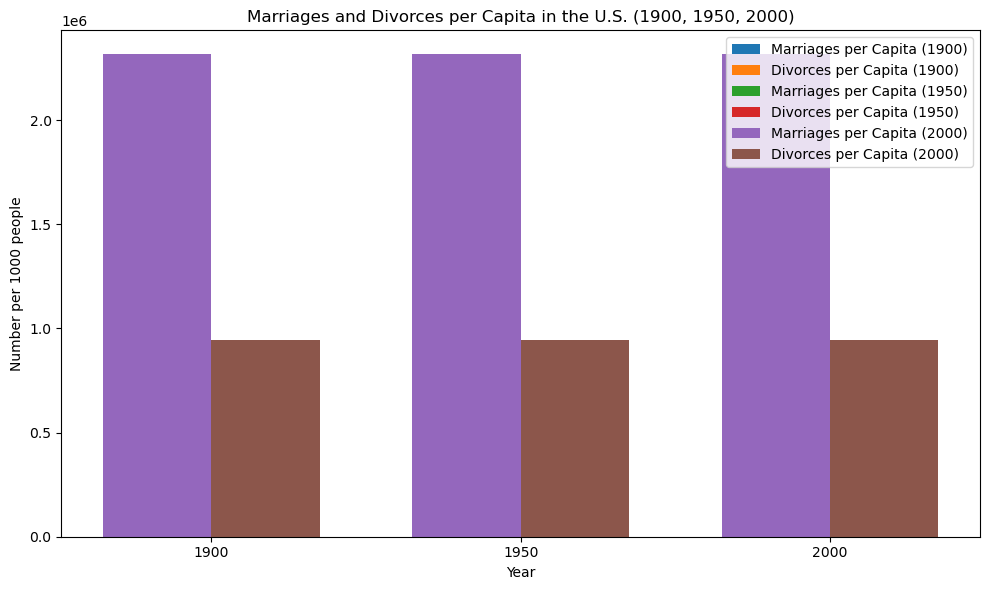

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(years))

plt.bar(index, filtered_data[filtered_data['Year'] == 1900]['Marriages'], bar_width, label='Marriages per Capita (1900)')
plt.bar([i + bar_width for i in index], filtered_data[filtered_data['Year'] == 1900]['Divorces'], bar_width, label='Divorces per Capita (1900)')
plt.bar(index, filtered_data[filtered_data['Year'] == 1950]['Marriages'], bar_width, label='Marriages per Capita (1950)')
plt.bar([i + bar_width for i in index], filtered_data[filtered_data['Year'] == 1950]['Divorces'], bar_width, label='Divorces per Capita (1950)')
plt.bar(index, filtered_data[filtered_data['Year'] == 2000]['Marriages'], bar_width, label='Marriages per Capita (2000)')
plt.bar([i + bar_width for i in index], filtered_data[filtered_data['Year'] == 2000]['Divorces'], bar_width, label='Divorces per Capita (2000)')

plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()


<h1>Q8.</h1>

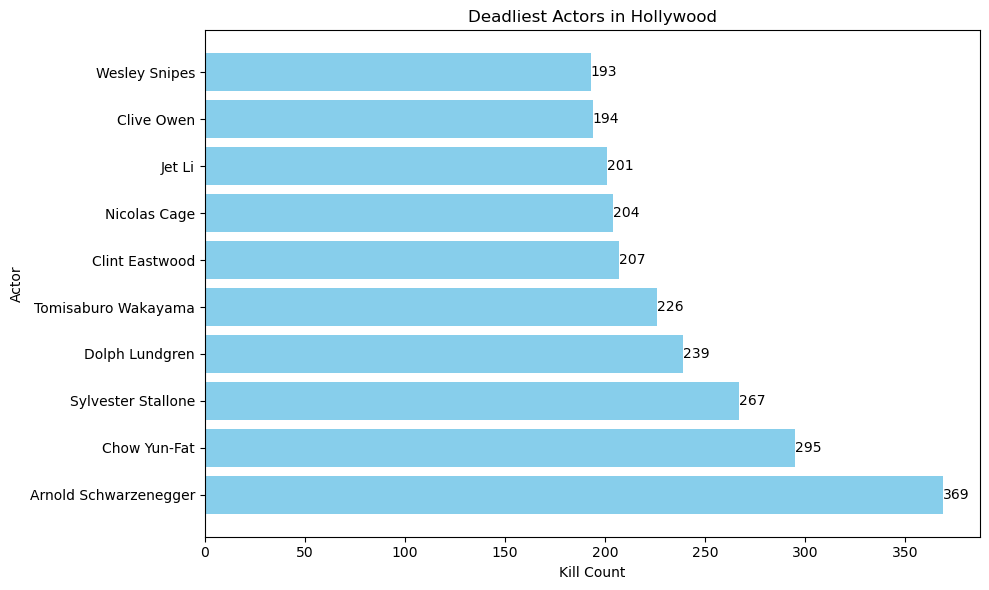

In [83]:
data = pd.read_csv("actor_kill_counts.csv")

sorted_data = data.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
for i, (actor, kill_count) in enumerate(zip(sorted_data['Actor'], sorted_data['Count'])):
    plt.text(kill_count, i, f'{kill_count}', ha='left', va='center')

plt.tight_layout()
plt.show()


<h1>Q9.</h1>

In [89]:
data = pd.read_csv("roman-emperor-reigns.csv")

In [91]:
cause_of_death = data['Cause_of_Death'].value_counts()
cause_of_death

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

<AxesSubplot:ylabel='Cause_of_Death'>

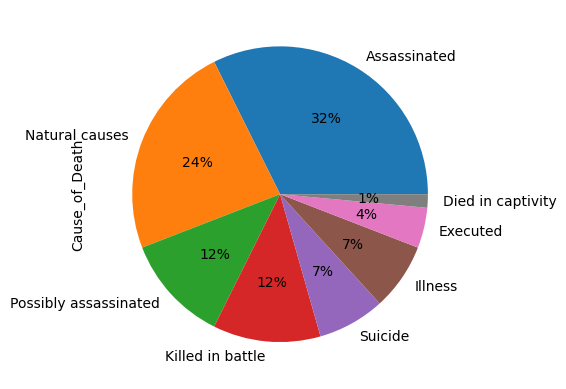

In [92]:
cause_of_death.plot(kind='pie',autopct='%1.0f%%')

<h1>Q10.</h1>

In [94]:
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

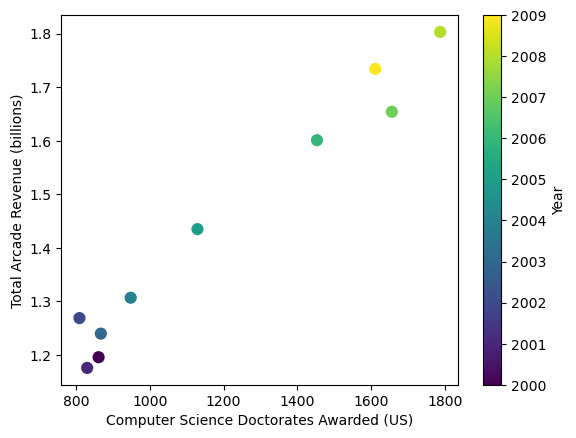

In [95]:
fig, ax = plt.subplots()
data.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',s=60,c = 'Year',colormap='viridis',ax=ax)
